In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import explained_variance_score
from sklearn.feature_selection import RFECV
from sklearn.tree import plot_tree, export_graphviz
import matplotlib.pyplot as plt

# 1. Base de dados com contações após 1, 2, 3, 4 e 5 anos

In [2]:
df = pd.read_csv('Datasets/transformation_disc_result_SD.csv')

In [3]:
x = df.drop('Open_dif_disc', axis=1)
y = df['Open_dif_disc']

## 1. Seleção dos atributos mais significativos (no mínimo 5)

In [4]:
# rfecv = RFECV(DecisionTreeClassifier(max_depth=5), min_features_to_select=5, cv=5)
rfecv = RFECV(DecisionTreeClassifier(max_depth=5), min_features_to_select=5, cv=5)

In [5]:
x_r = rfecv.fit_transform(x,y)

c:\users\panto\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(


## 2. Aplicação de validação cruzada

In [12]:
cv_result = cross_val_score(DecisionTreeClassifier(), x_r, y, scoring='accuracy', cv=5)

In [13]:
cv_result

array([0.32375979, 0.39947781, 0.34464752, 0.42819843, 0.37434555])

## 3. Novamente a execução do treinamento com árvore de decisão
Após a execução, uma visualização gráfica da árvore é gerada.

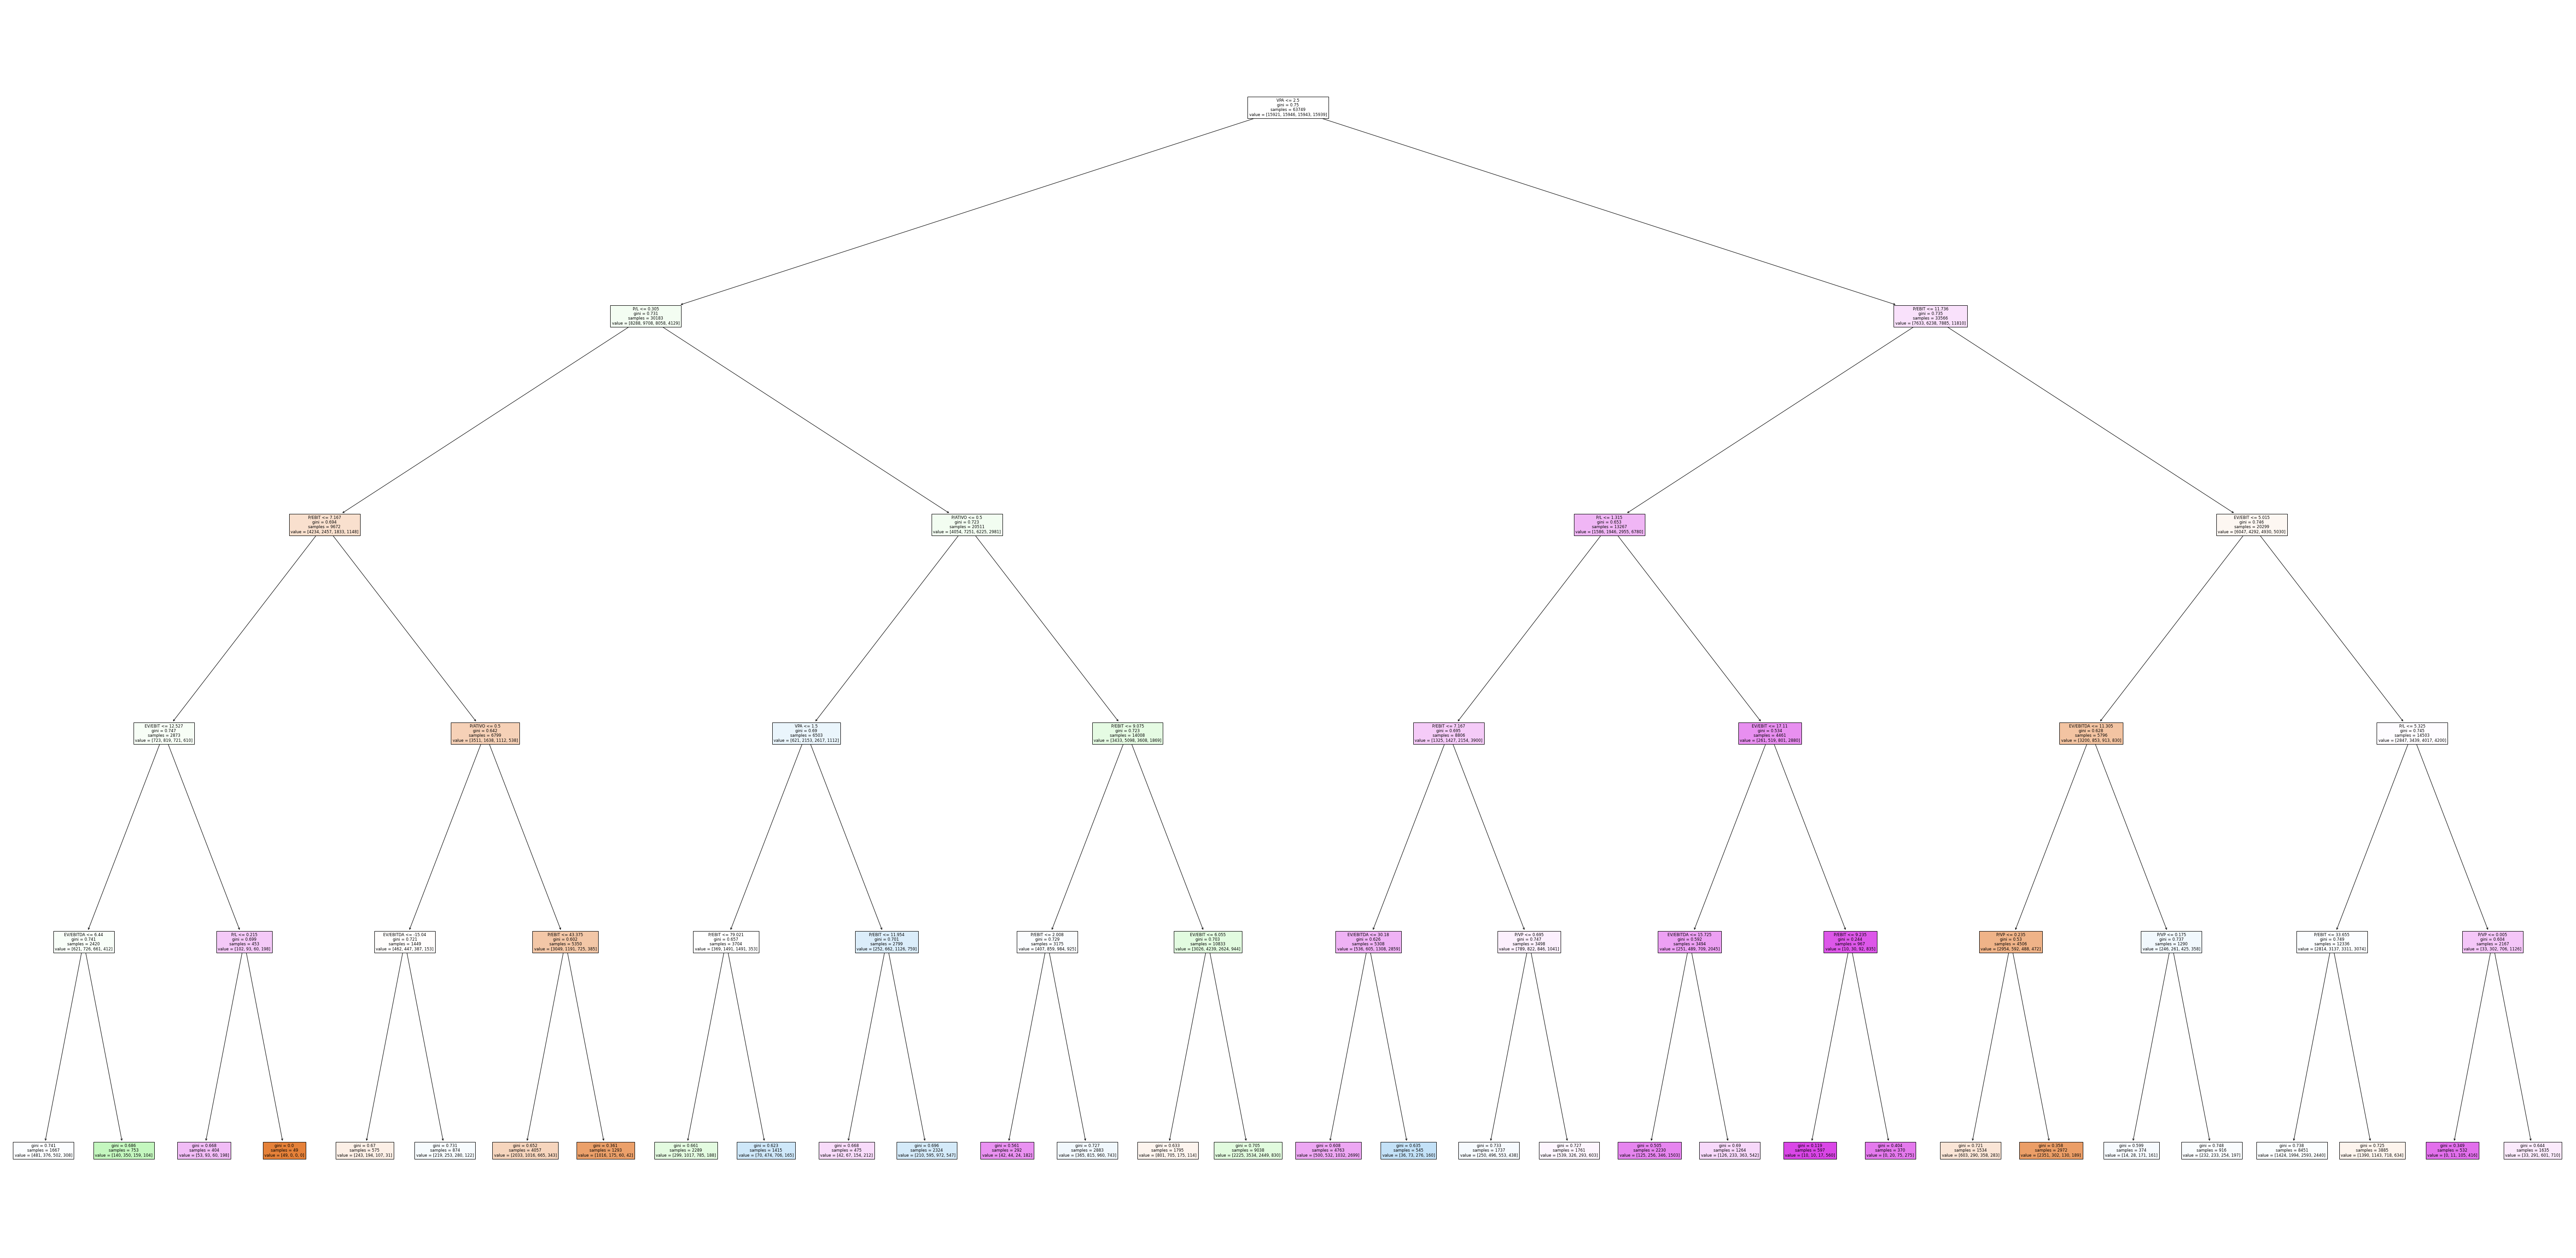

In [8]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(x_r,y)

fig = plt.figure(figsize=(100,50))
_ = plot_tree(tree, 
                   feature_names=x.columns,  
                   filled=True)
plt.savefig("Trees\\tree.jpeg", bbox_inches='tight')

# 2. Toda a rotina é repetida para as demais base de dados

In [9]:
dfs = [pd.read_csv('Datasets/transformation_disc_result_1_year_SD.csv'),
       pd.read_csv('Datasets/transformation_disc_result_2_year_SD.csv'),
       pd.read_csv('Datasets/transformation_disc_result_3_year_SD.csv'),
       pd.read_csv('Datasets/transformation_disc_result_4_year_SD.csv'),
       pd.read_csv('Datasets/transformation_disc_result_5_year_SD.csv')]

c:\users\panto\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(
c:\users\panto\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(
c:\users\panto\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(
c:\users\panto\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(
c:\users\panto\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:441: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  warnings.warn(


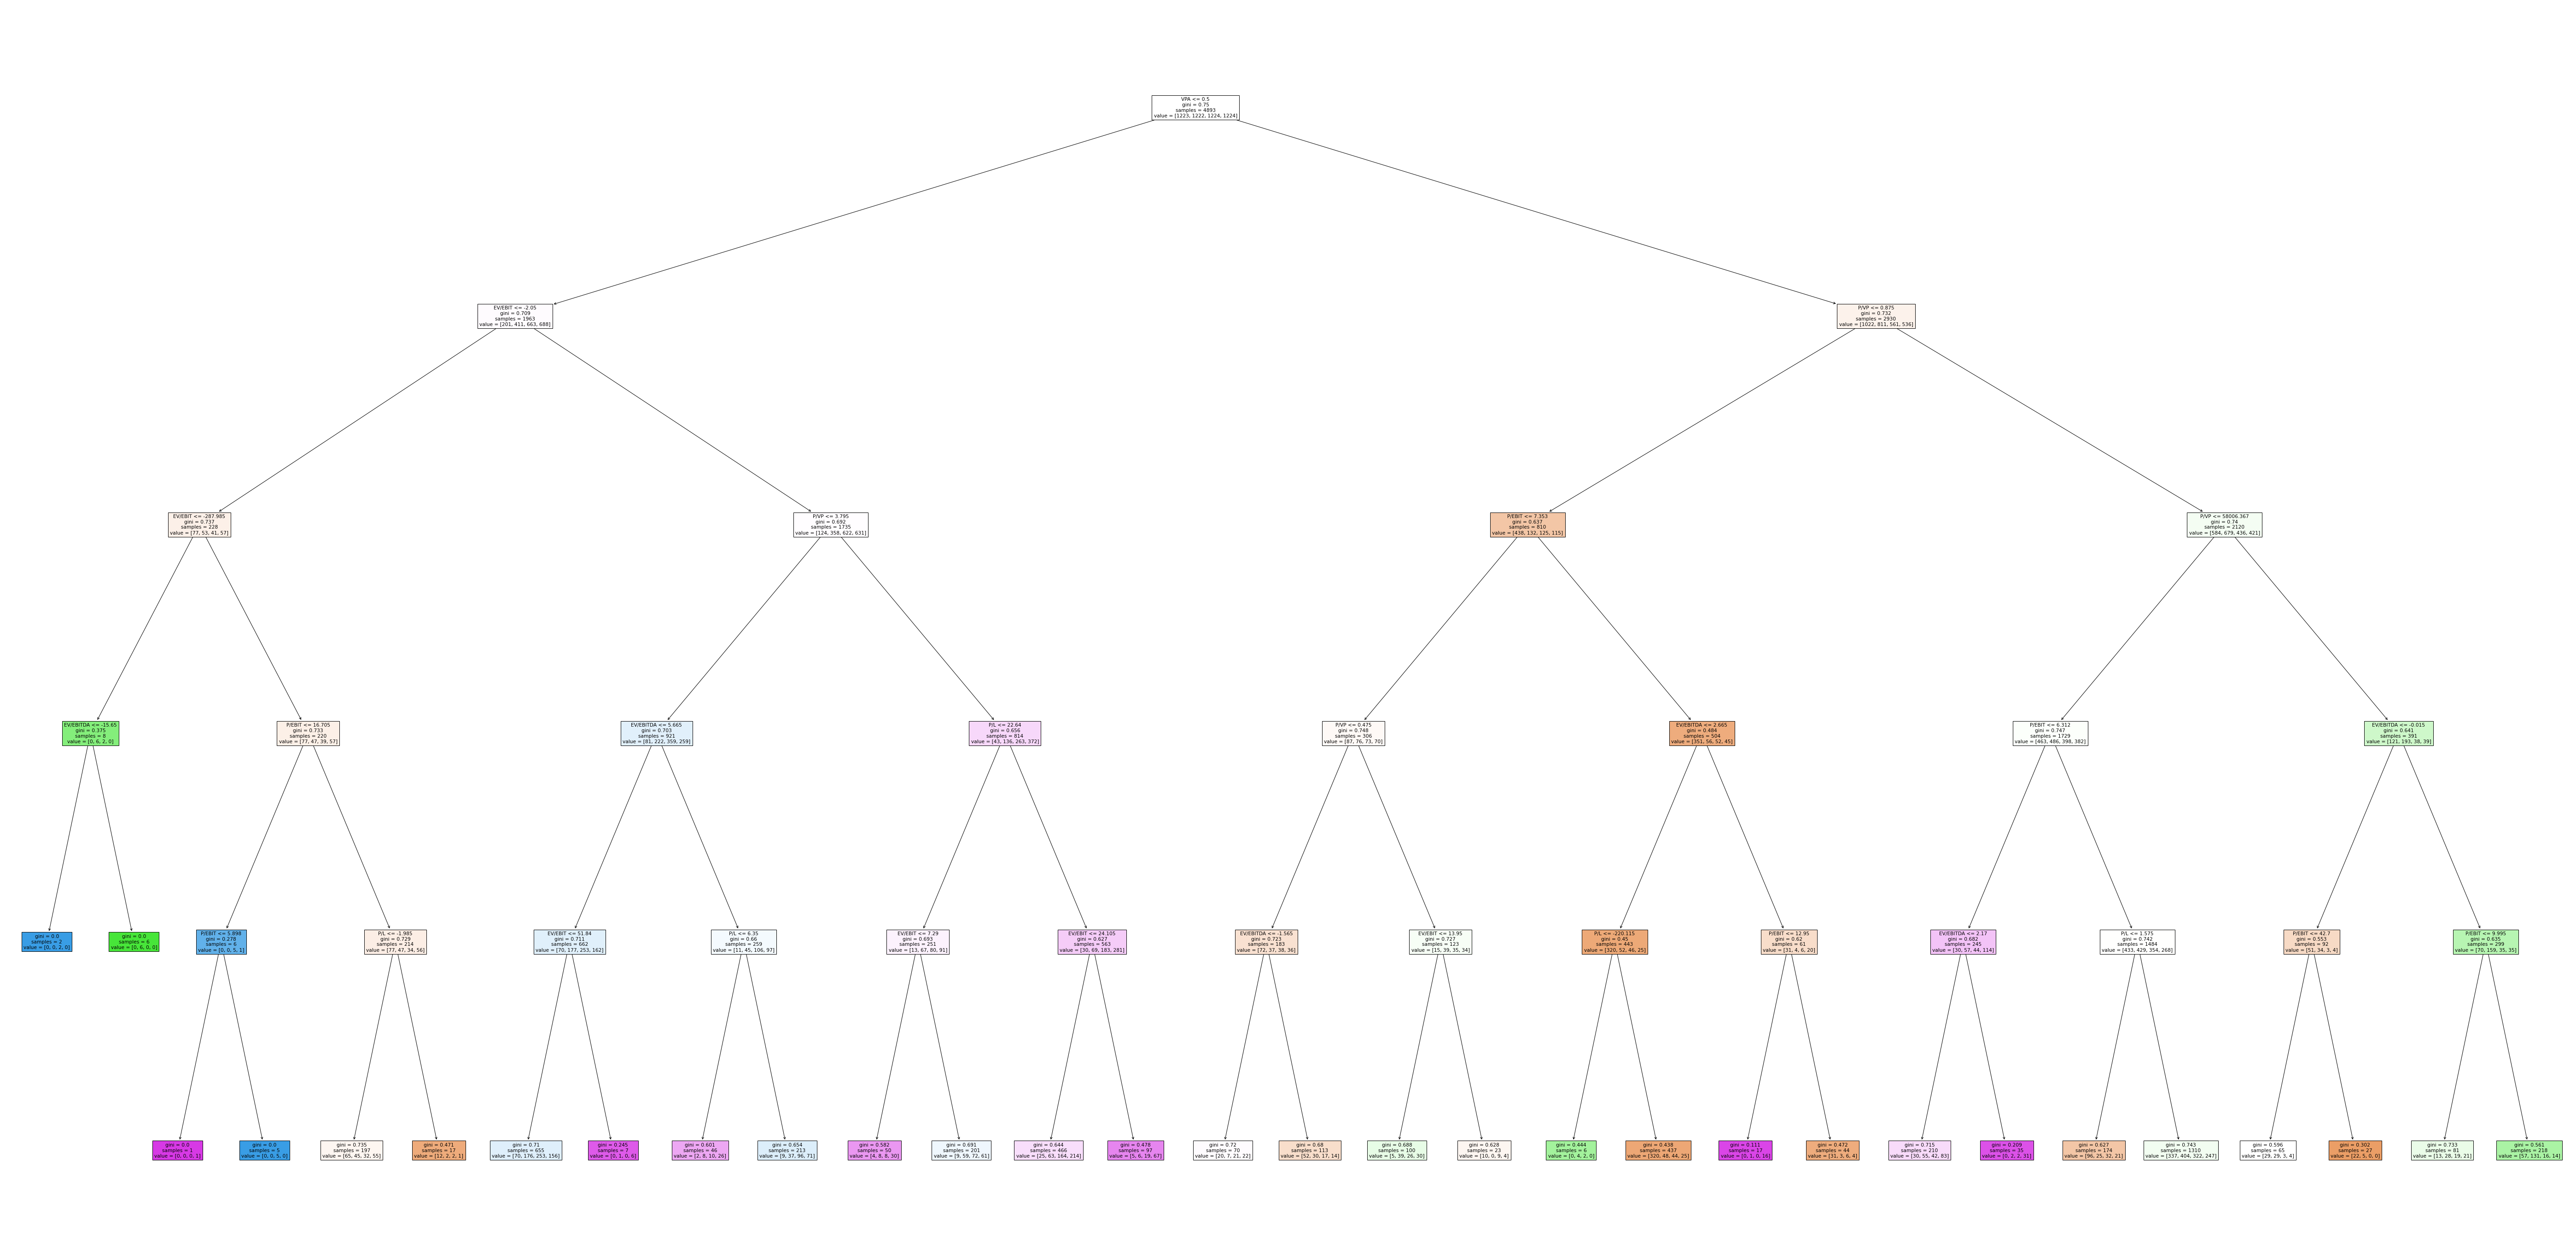

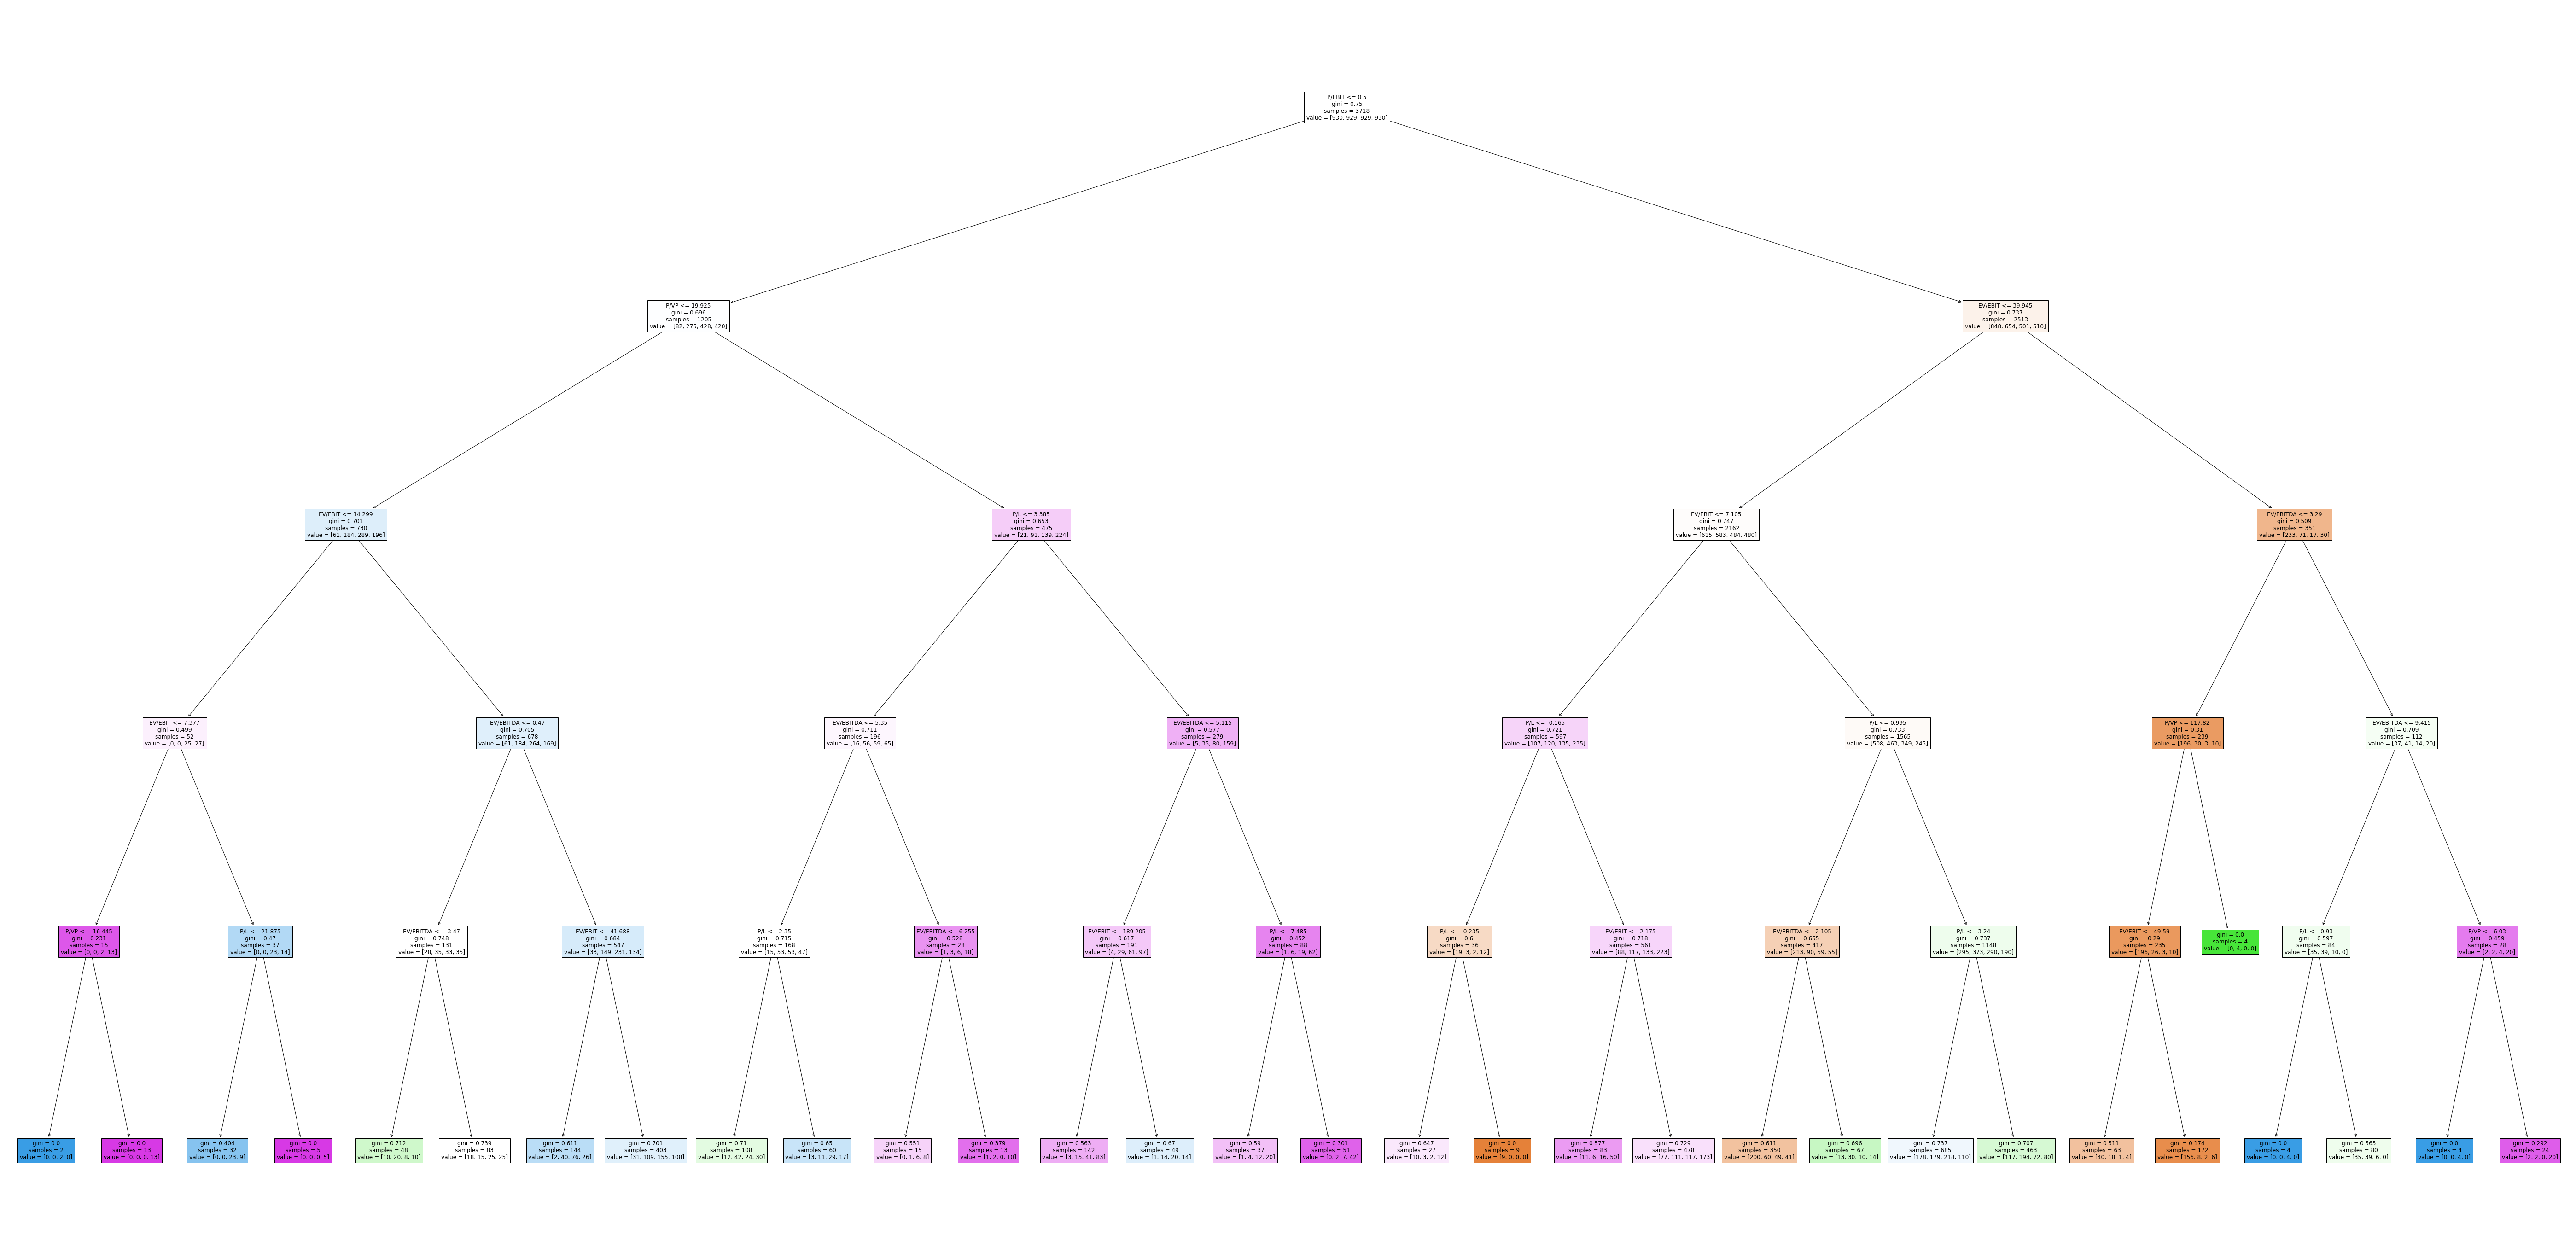

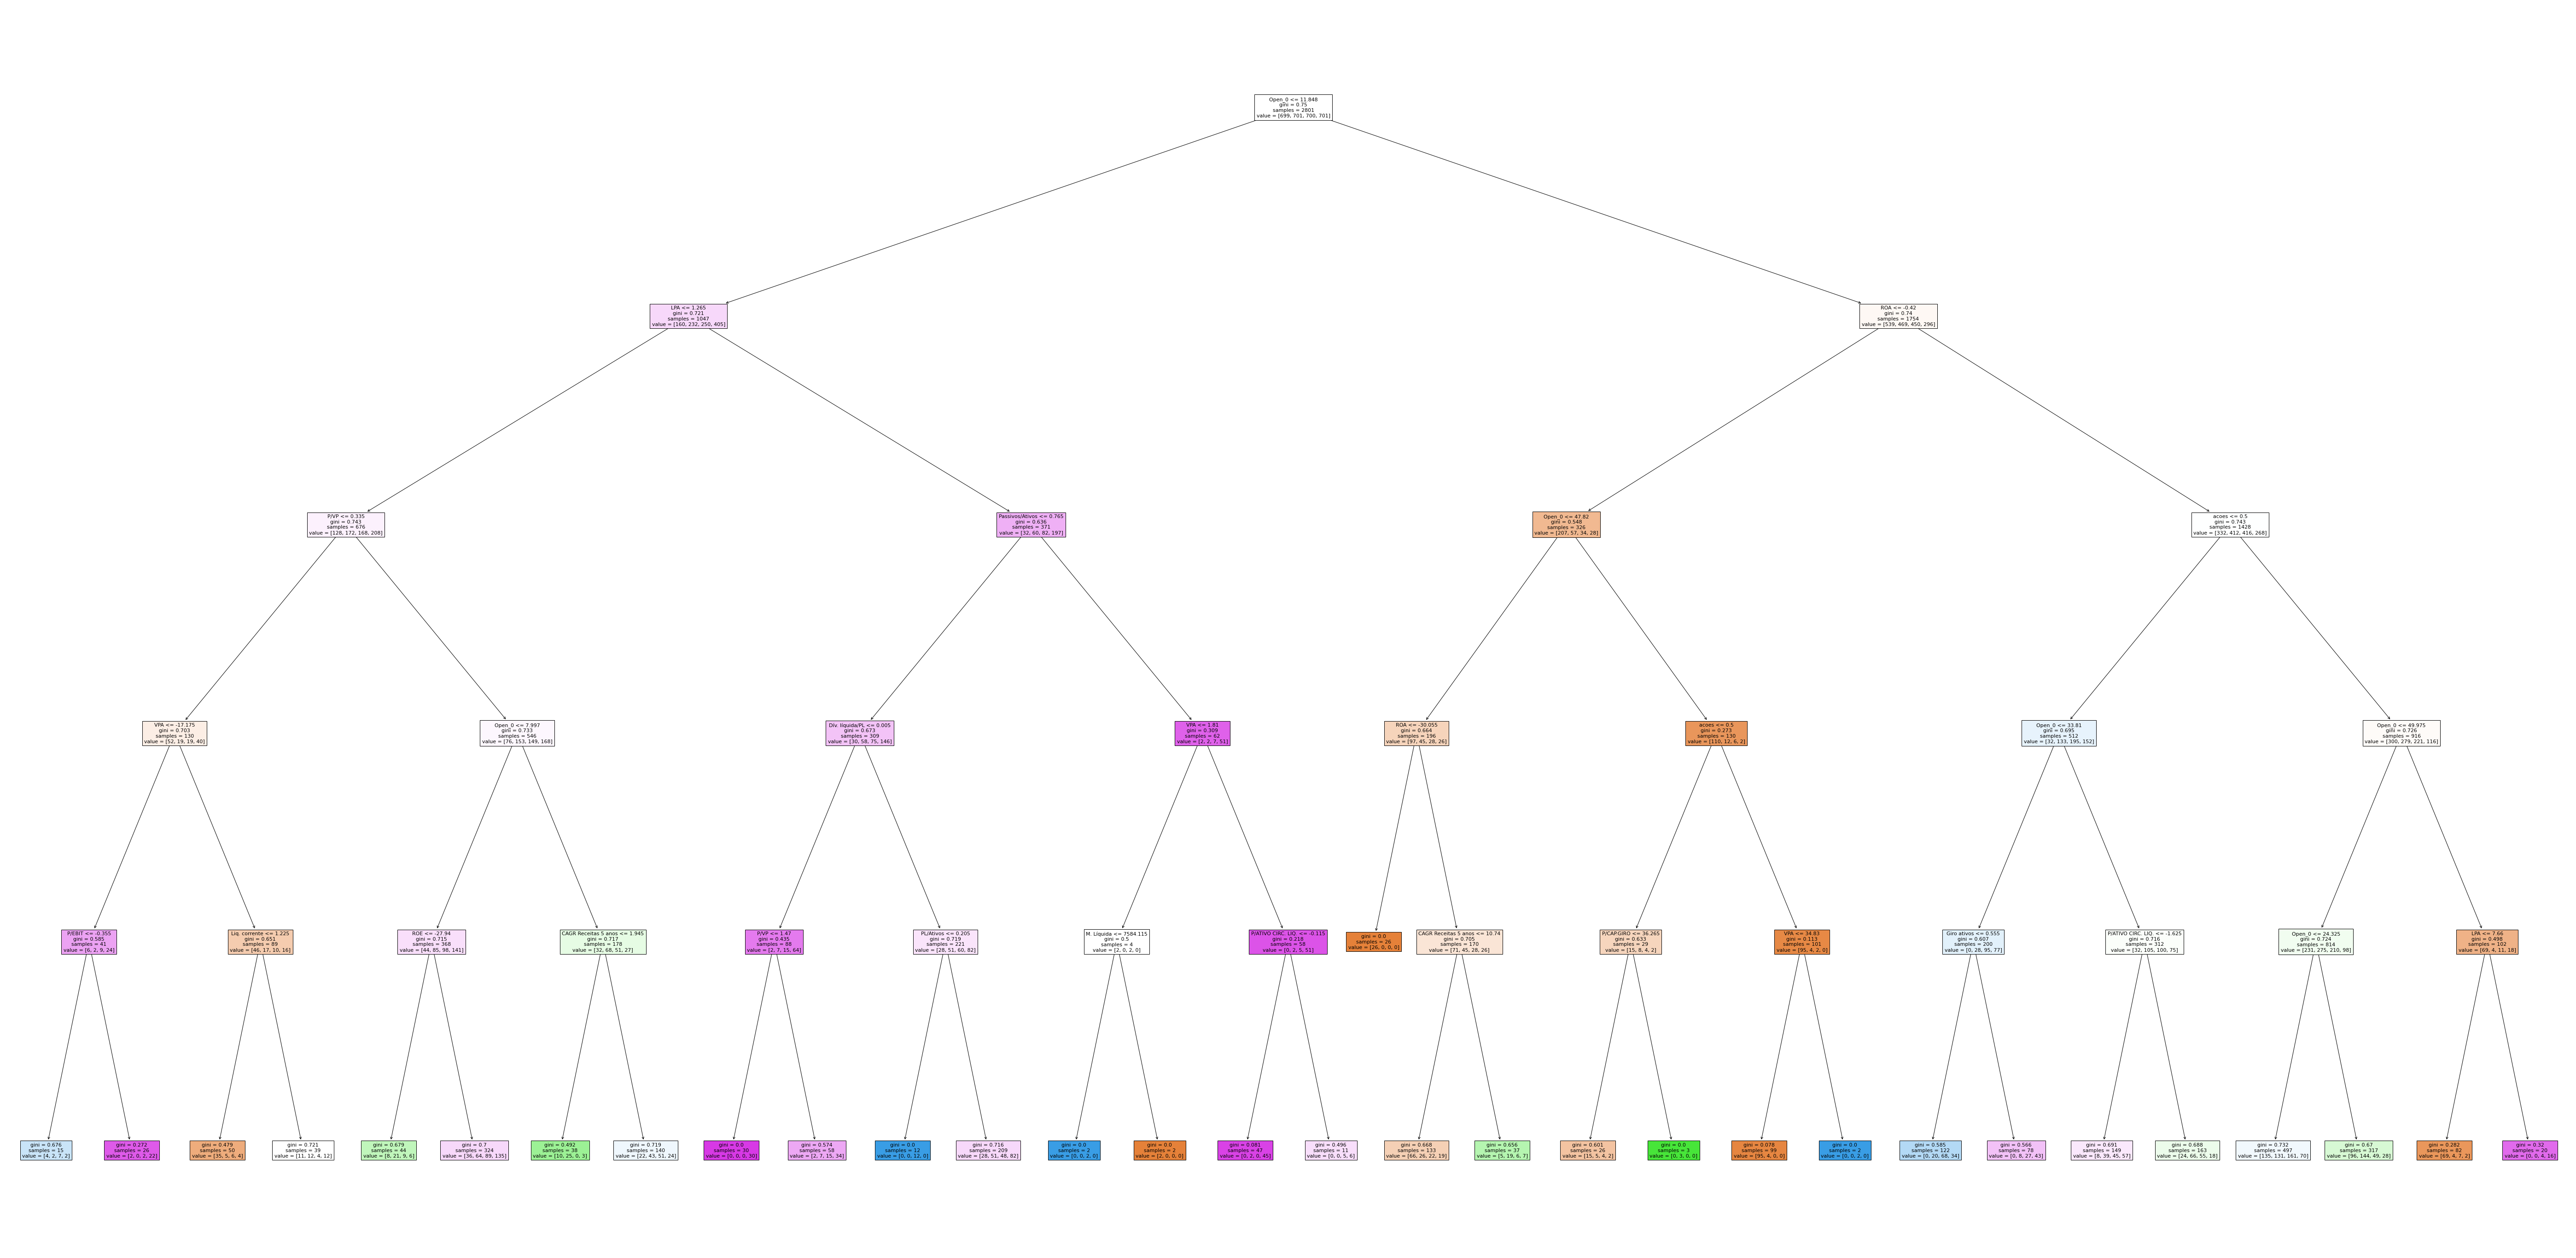

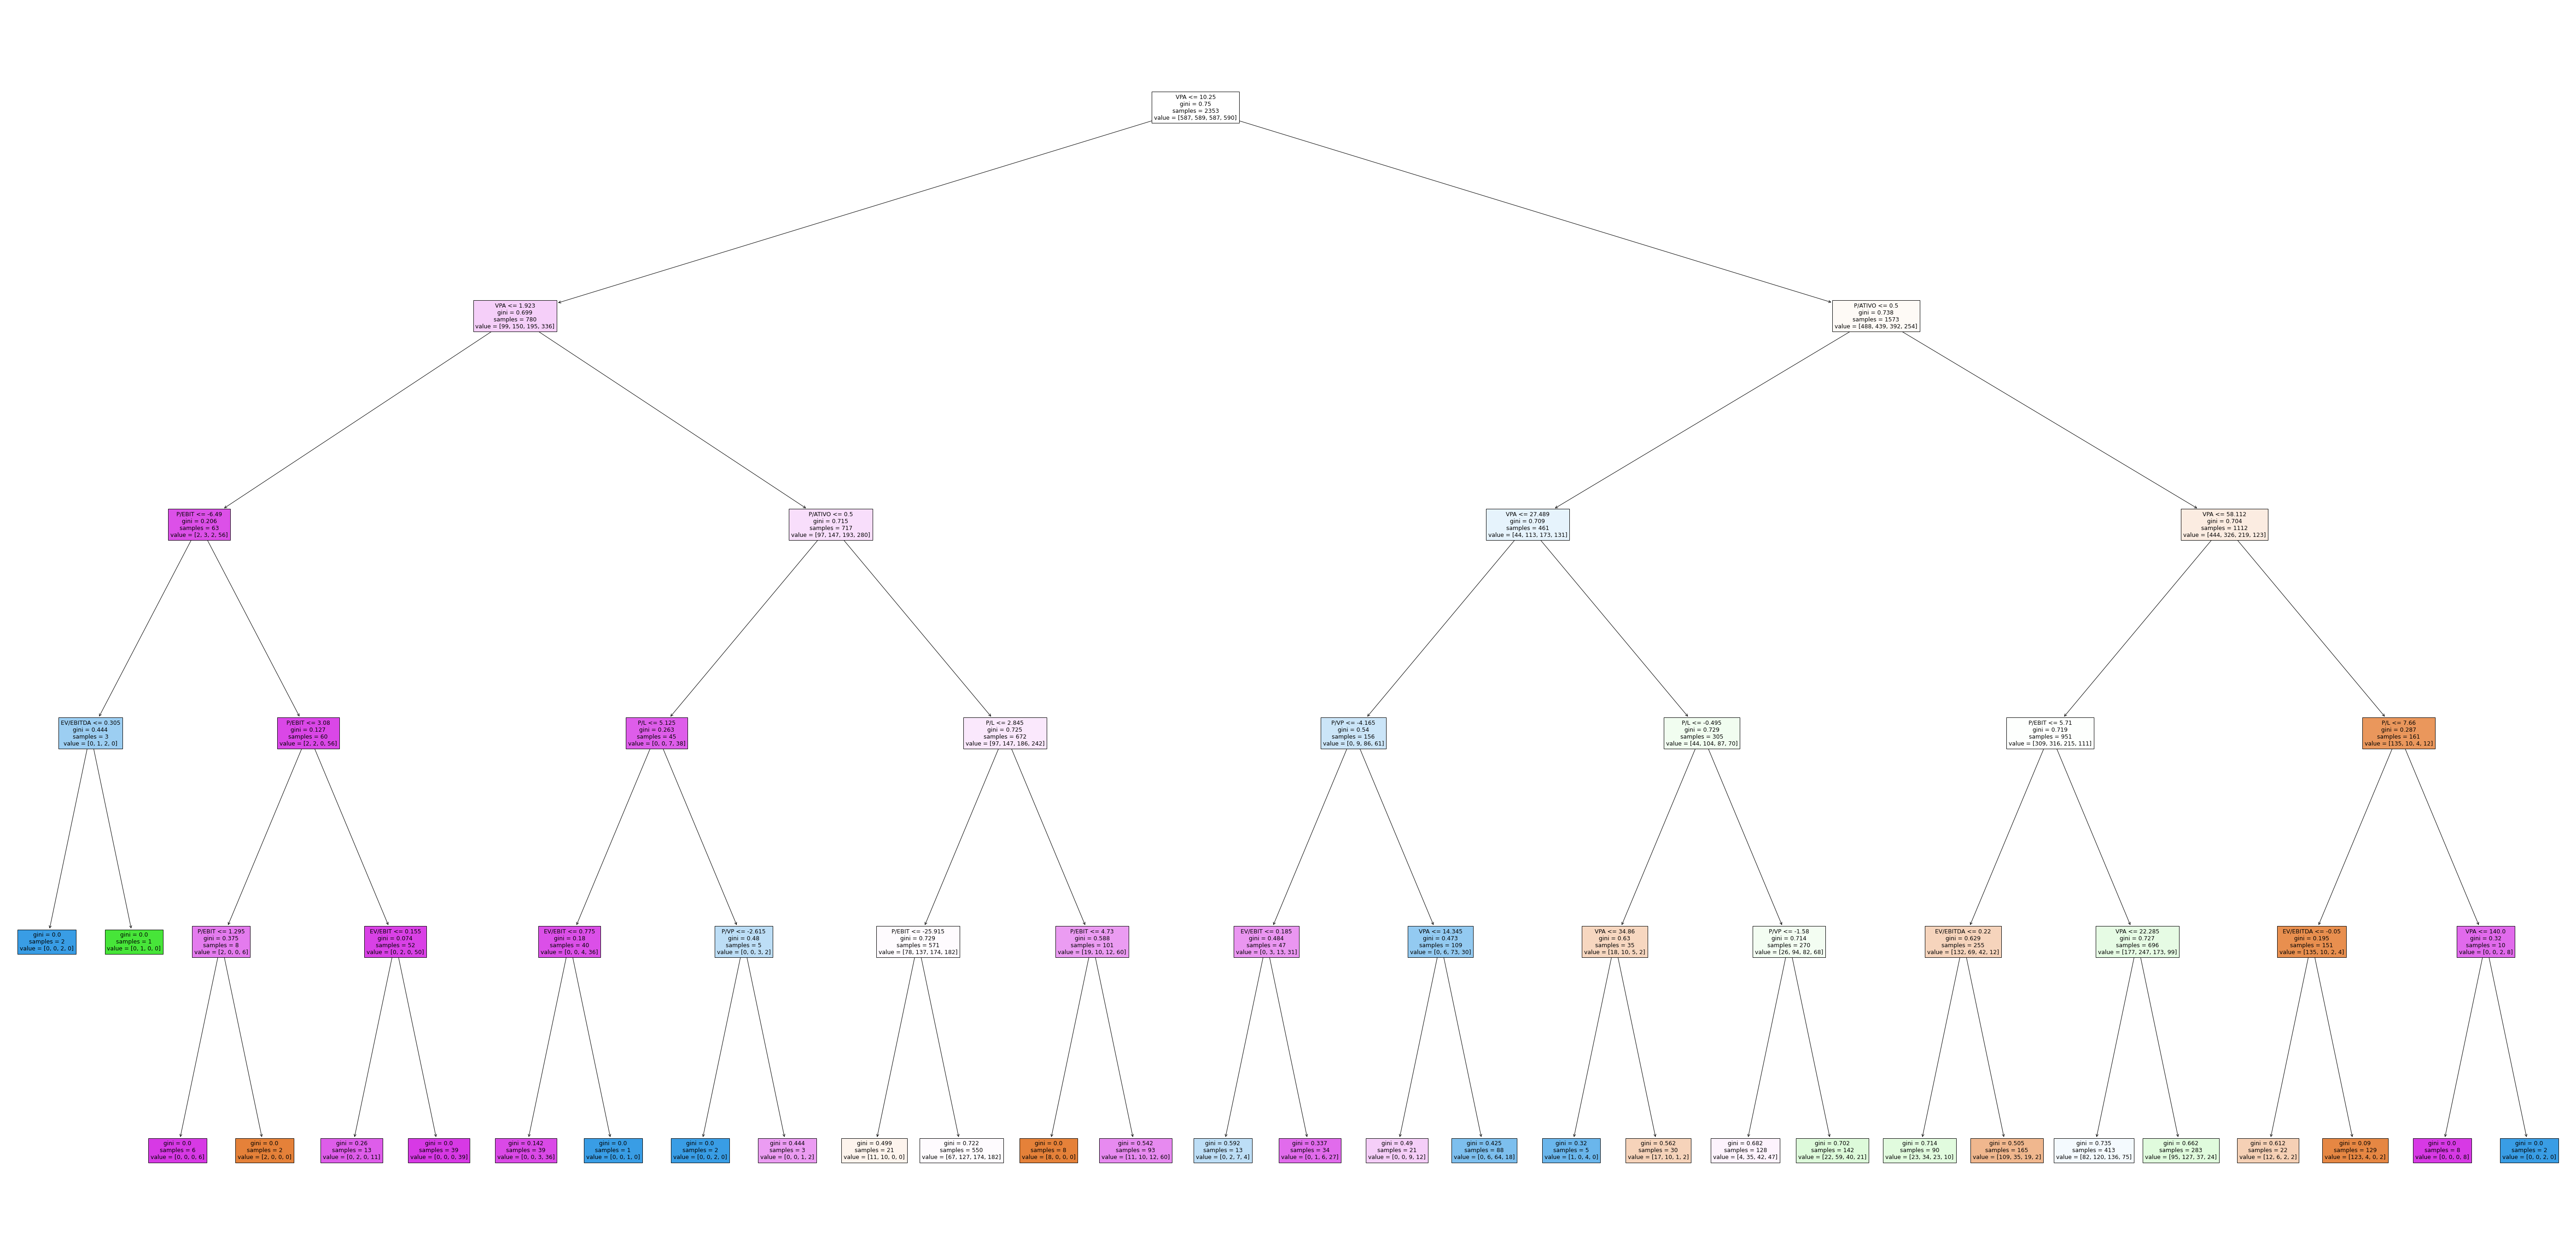

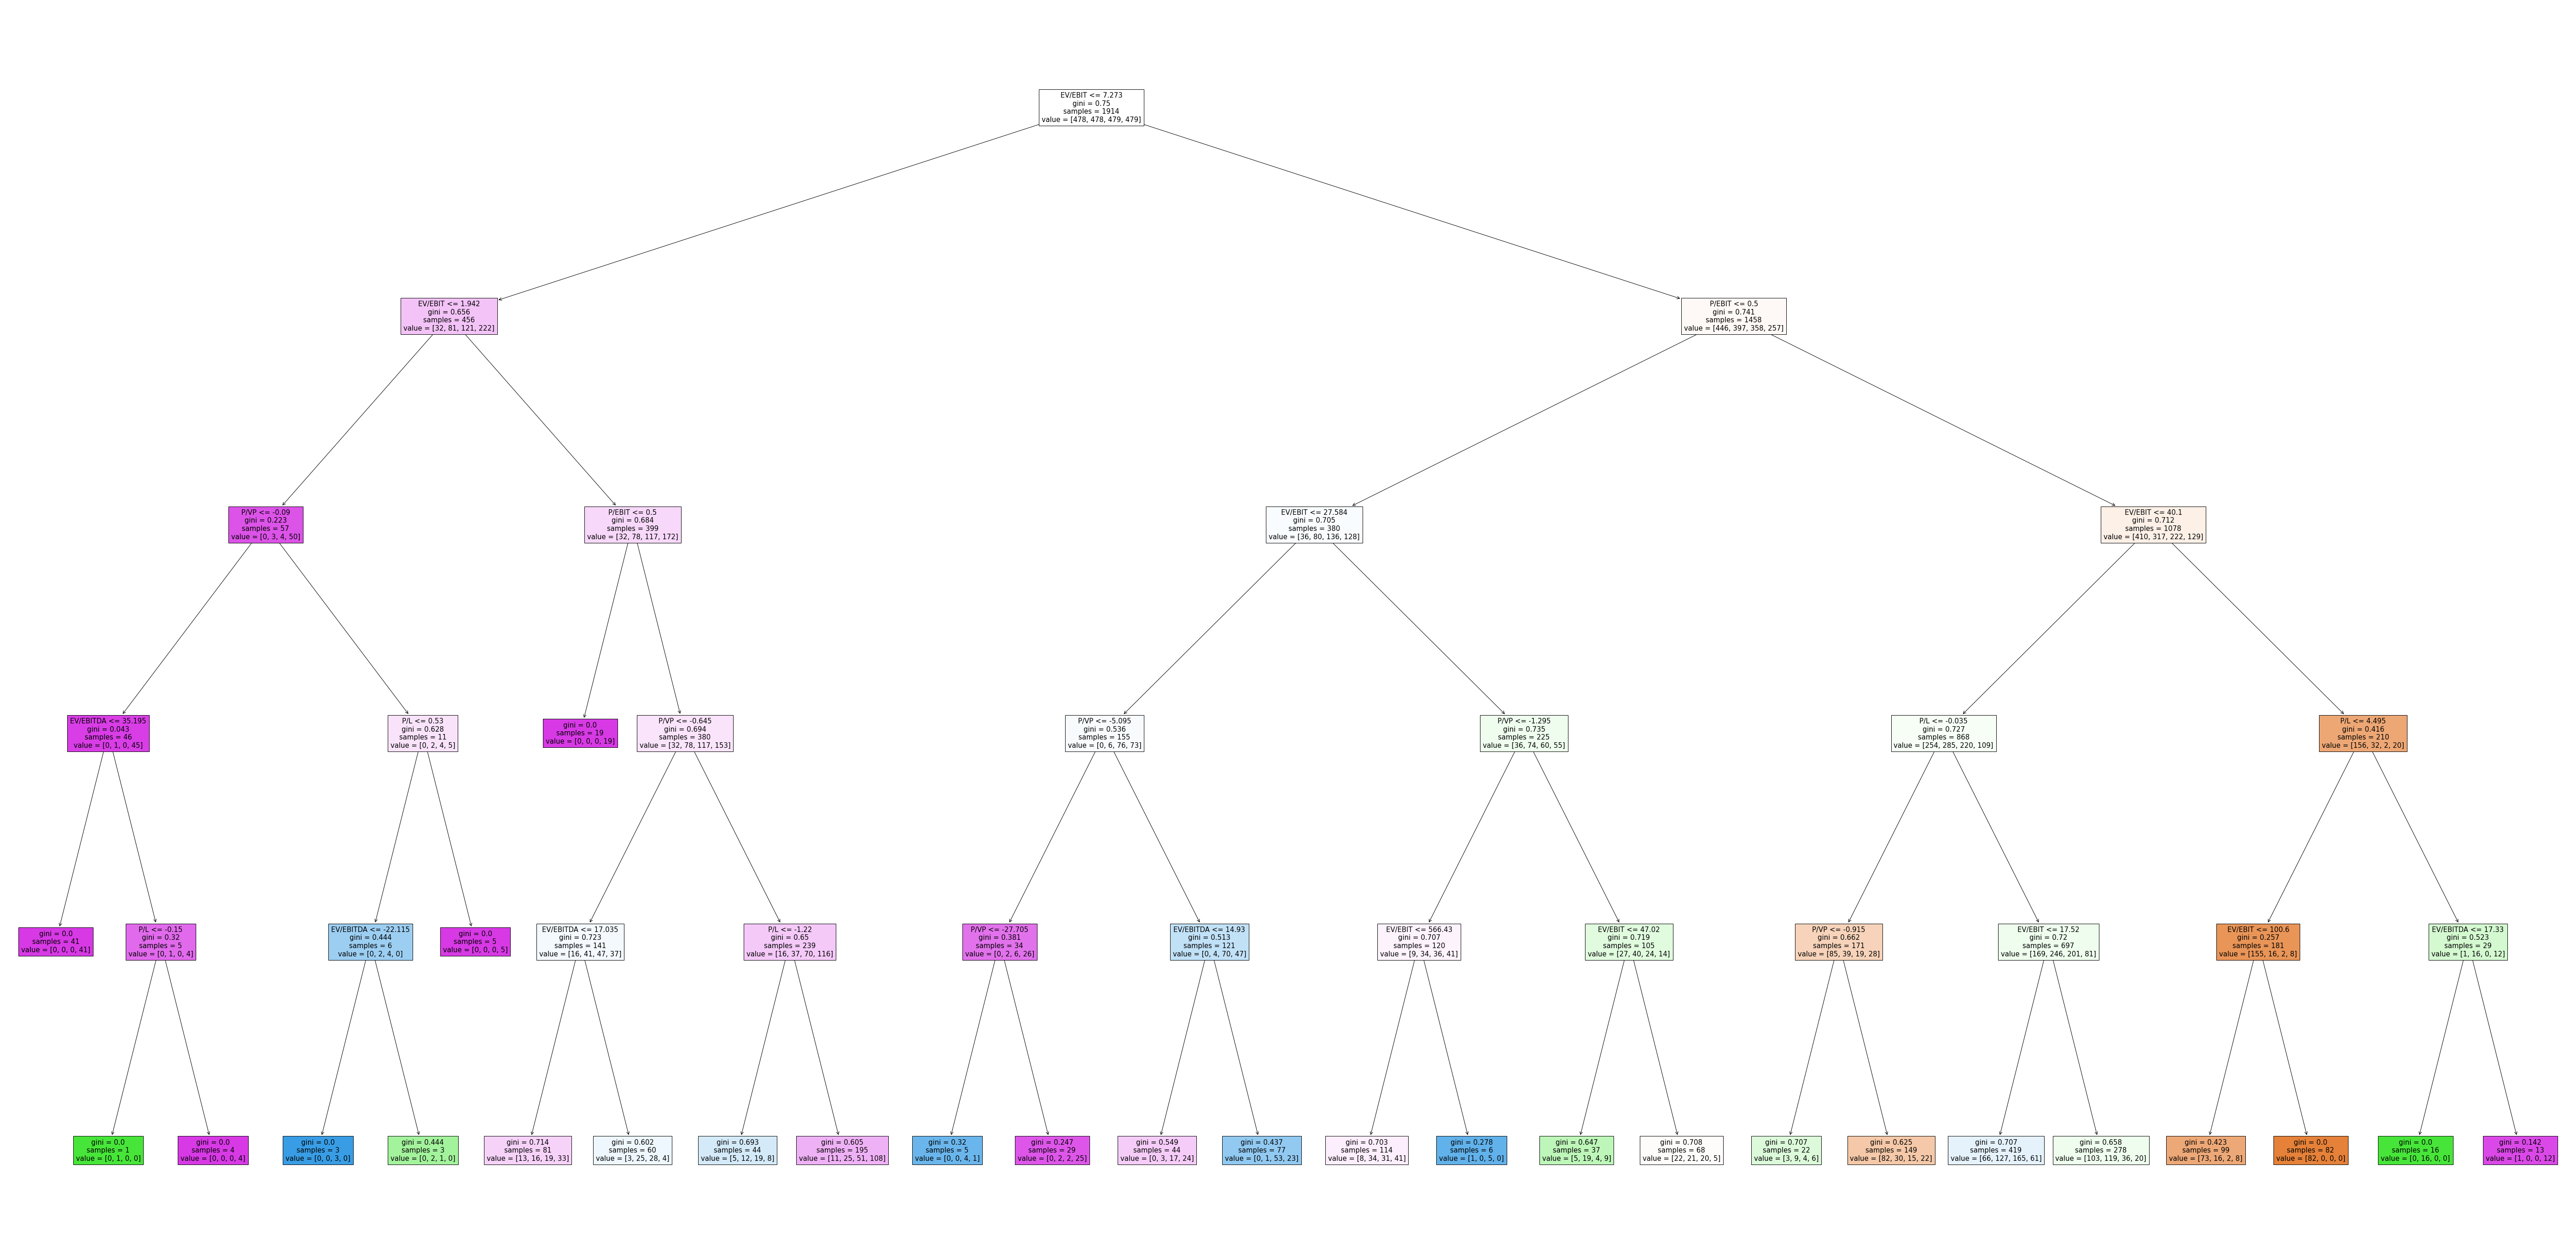

In [10]:
cv_result = []
for i in range(1,6):
    x = dfs[i-1].drop('Open_dif_disc', axis=1)
    y = dfs[i-1]['Open_dif_disc']
    rfecv = RFECV(DecisionTreeClassifier(max_depth=5), min_features_to_select=5, cv=5)
    
    x_r = rfecv.fit_transform(x,y)
    
    cv_result.append(cross_val_score(DecisionTreeClassifier(), x_r, y, scoring='r2', cv=5))
    
    tree = DecisionTreeClassifier(max_depth=5)
    tree.fit(x_r,y)
    
    fig = plt.figure(figsize=(100,50))
    _ = plot_tree(tree, 
                       feature_names=x.columns,  
                       filled=True)
    plt.savefig("Trees\\tree_{}.jpeg".format(i), bbox_inches='tight')

In [11]:
cv_result

[array([-0.56440122, -0.74892872, -0.41906541, -0.22736583, -0.59918735]),
 array([-0.90430108, -0.68064516, -0.17204301, -0.31218117, -0.12933625]),
 array([-0.52653061, -0.70285714, -0.67857143, -0.41571429, -0.11318336]),
 array([-0.39211656, -0.0190768 , -0.53978283, -0.38043053,  0.05531573]),
 array([-0.299859  , -0.52371234, -0.34862091, -0.2852068 ,  0.09737725])]